In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
url = "https://github.com/xlesley/econ481-project/raw/main/diamonds.csv"
df = pd.read_csv(url)
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


## Data Inspection




In [3]:
#Check for null values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [4]:
#Check for duplicates
print(df.duplicated().sum())

126


In [5]:
#Delete duplicates
df = df.drop_duplicates(keep = "first")

## EDA

In [6]:
print(df.describe(include='all'))
print(df.info())

               carat    cut  color clarity         depth         table  \
count   49874.000000  49874  49874   49874  49874.000000  49874.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  19881  10424   12086           NaN           NaN   
mean        0.799331    NaN    NaN     NaN     61.751803     57.458786   
std         0.474607    NaN    NaN     NaN      1.428207      2.231087   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   49874.000000  49874.000000  49874.0000

### Histogram

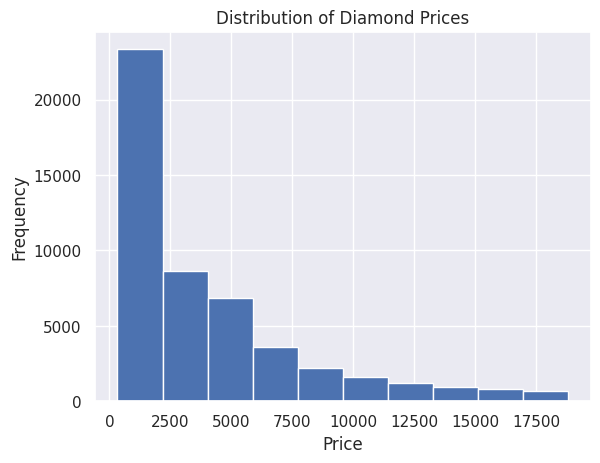

In [7]:
sns.set()
plt.hist(df['price'], bins=10)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis

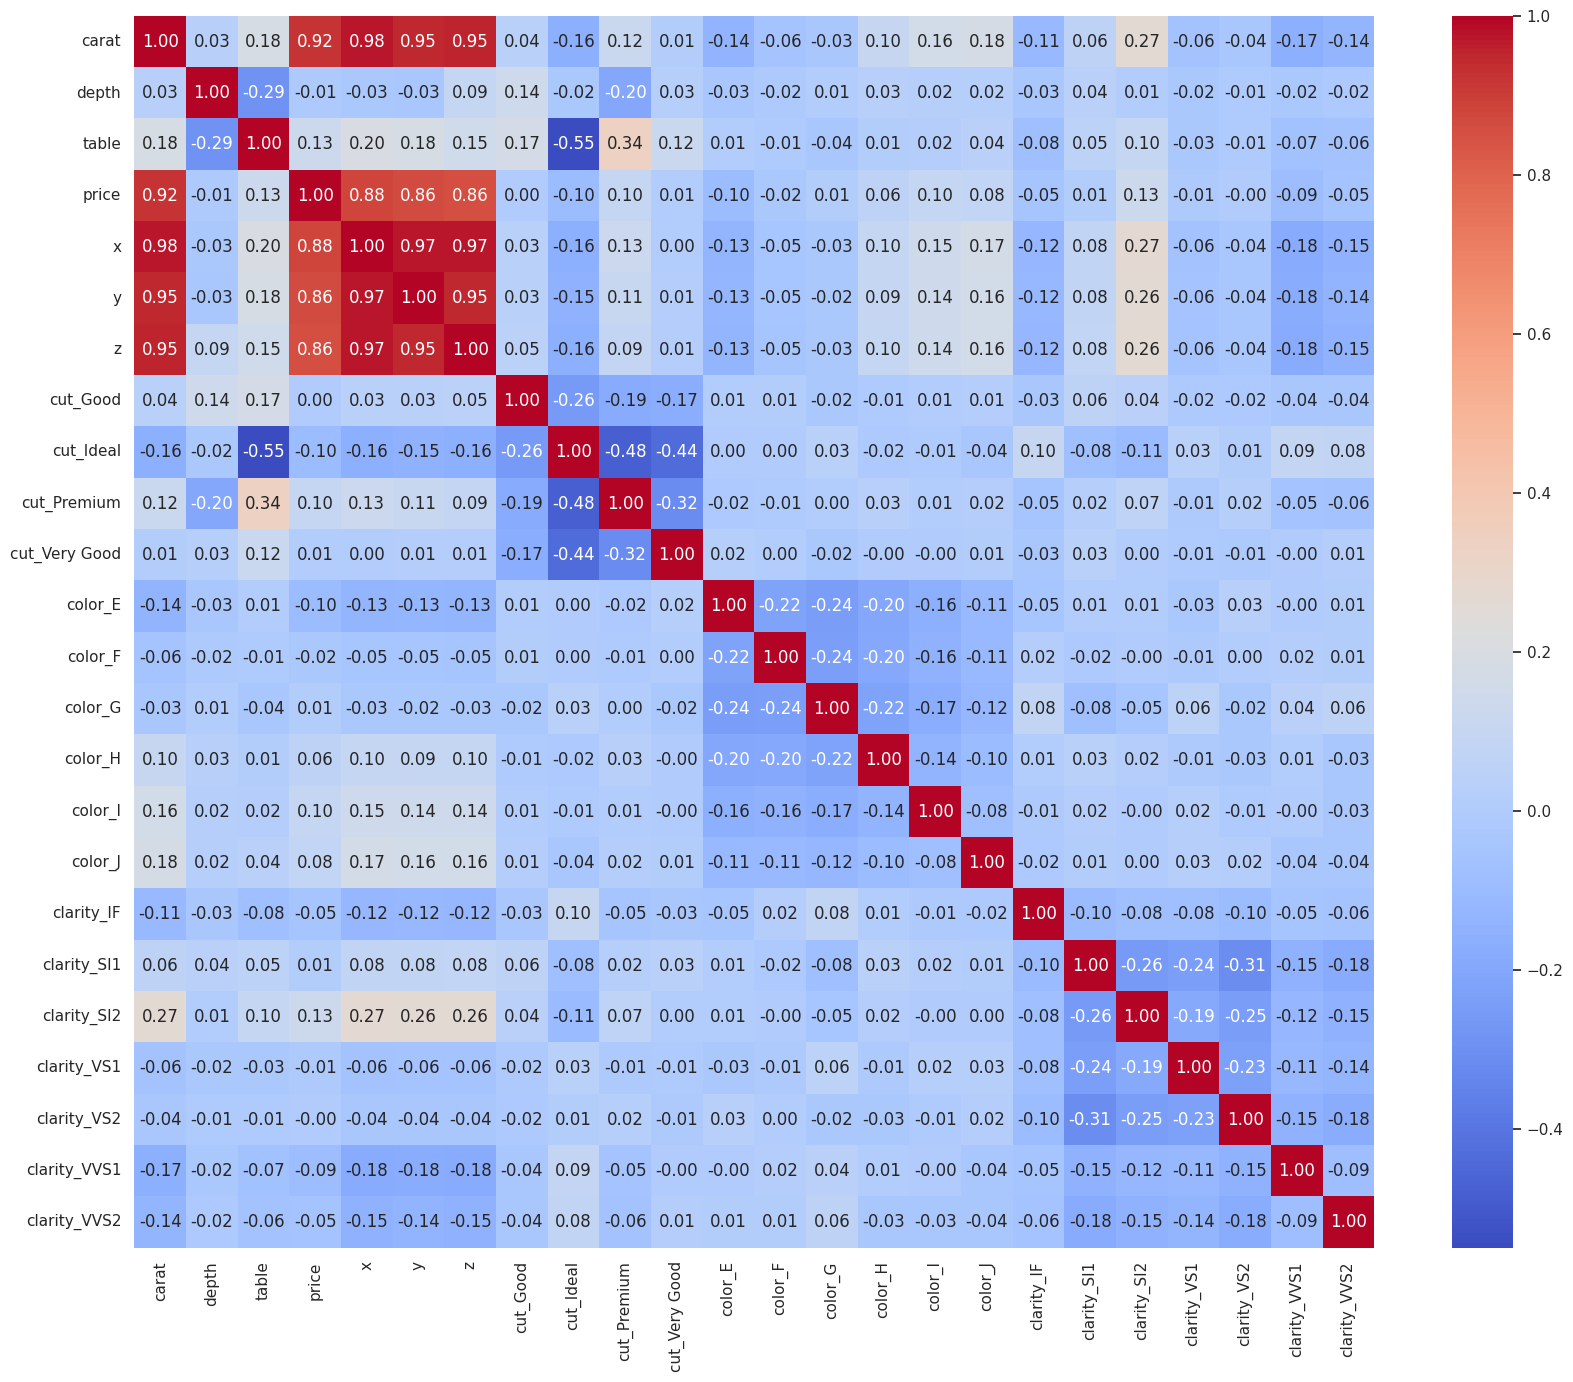

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Model

## Linear Regression

In [9]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

#Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Check data types after conversion
print(X.dtypes)

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object


In [10]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LassoCV to find the best alpha value
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Print the best alpha value found
print(f"Best alpha value: {lasso_cv.alpha_}")

# Train the LASSO model with the best alpha value
lasso_model = lasso_cv

# Make predictions
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Best alpha value: 3.693939305893496
Train MSE: 1285979.281935052
Test MSE: 1286194.117081255
Train R2: 0.9198368313670552
Test R2: 0.9181113852282998


In [11]:
X = df[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']]
y = df['price']

#Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Check data types after conversion
print(X.dtypes)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant to the predictors for the intercept term
X_train = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print the model summary
print(model.summary())

carat            float64
x                float64
y                float64
z                float64
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        02:29:34   Log-Likelihood:           

In [12]:
# Add constant to the predictors for the intercept term in the test dataset
X_test_const = sm.add_constant(X_test)

# Make predictions on the test dataset
y_test_pred = model.predict(X_test_const)

In [13]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
ssr = ((y_test_pred - y_test.mean())**2).sum()
sst = ((y_test - y_train.mean())**2).sum()
r2 = ssr/sst
r2

0.9163918358690144

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)
# Add constant term to the test predictors
X_test_const = sm.add_constant(X_test)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = model.predict(X_test_const)

# Evaluate the model
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print("Train R^2 Score (Random Forest):", train_r2_rf)
print("Test R^2 Score (Random Forest):", test_r2_rf)

Train R^2 Score (Random Forest): 0.9965289046207175
Test R^2 Score (Random Forest): 0.9180451721434599
